The following analysis is based on the following search query:
"New Work" AND "performance measurement"

In [2]:
import numpy as np
import pandas as pd
from pyBibX.base import pbx_probe
from tabulate import tabulate
from prettytable import PrettyTable

c:\Users\bicic\Documents\Programming\bibliography\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load bib file
# Arguments for pbx_probe: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
# Note: the other arguments lead to an key error for some reason 
file_path = './bib-Files-raw/scopus03.bib'
database = 'scopus'
bibfile = pbx_probe(file_bib = file_path)

A Total of 273 Documents were Found ( 278 Documents and 5 Duplicates )

Article = 176
Book = 37
Book chapter = 28
Conference paper = 12
Review = 20


In [4]:
# Generic report
report = bibfile.eda_bib()


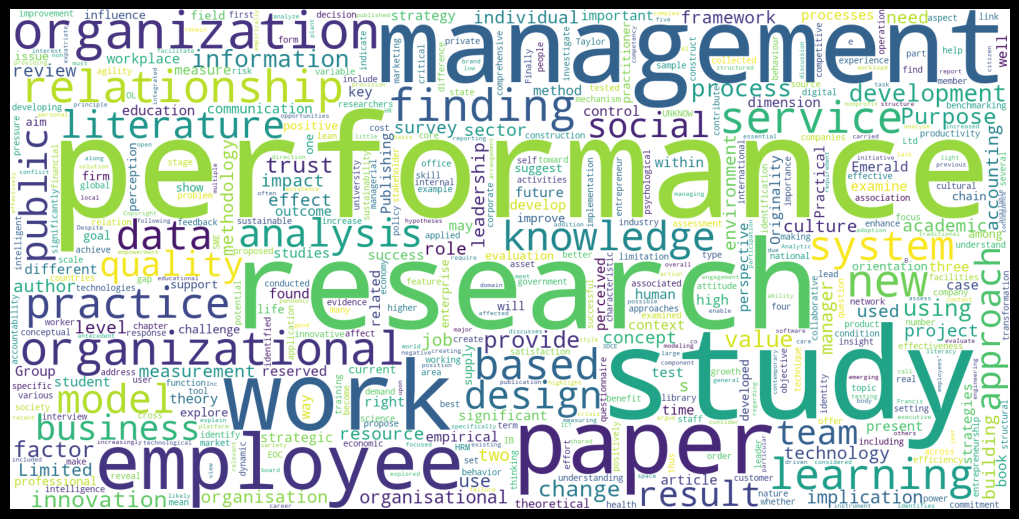

In [5]:
# Wordcloud from abstracts
bibfile.word_cloud_plot(entry='abs')

In [6]:
# Sorting words in abstracts by importance
table             = PrettyTable()
data_wd           = bibfile.ask_gpt_wd
table.field_names = ['Word', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value, 4)])
print(table)

+------------------+------------+
|       Word       | Importance |
+------------------+------------+
|   performance    |    1.0     |
|      study       |   0.7843   |
|     research     |   0.7318   |
|    management    |   0.7259   |
|       work       |   0.586    |
|      paper       |   0.5015   |
|     employee     |   0.4752   |
|   organization   |   0.4519   |
|  organizational  |   0.449    |
|       new        |   0.4257   |
|   relationship   |   0.4169   |
|     finding      |   0.4111   |
|     service      |   0.3994   |
|     practice     |   0.379    |
|     learning     |   0.3761   |
|      based       |   0.3673   |
|       data       |   0.3411   |
|      system      |   0.3411   |
|    knowledge     |   0.3294   |
|      model       |   0.3149   |
|     analysis     |   0.309    |
|      design      |   0.3032   |
|    literature    |   0.2945   |
|      public      |   0.2945   |
|     quality      |   0.2886   |
|     business     |   0.2886   |
|      social 

In [7]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                         'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                         'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Portuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                         'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'abs', ngrams = 2, stop_words = ['en'], rmv_custom_words = ['reserved', 'case', 'emerald', 'methodology', 'publishing', 'paper', 'taylor', 'springer', 'igi'], wordsn = 15)

In [8]:
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwa', ngrams = 2, stop_words = ['en'], rmv_custom_words = [], wordsn = 15)

In [9]:
# table of the most common n-grams
data_ng = bibfile.ask_gpt_ng
print(data_ng)

                          Word  Freq
0   organizational performance    10
1      organizational learning    10
2                 supply chain     9
3               human resource     9
4      performance measurement     8
5                public sector     8
6              job performance     7
7          resource management     7
8        management accounting     6
9         knowledge management     6
10            higher education     5
11              cross cultural     5
12      performance management     5
13  performance organizational     5
14   organizational commitment     4


In [10]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Number of Clusters;
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used)
projection, labels = bibfile.docs_projection(view              = 'notebook',
                                             corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             custom_label      = [],
                                             custom_projection = [],
                                             n_components      = 2,
                                             n_clusters        = 5,
                                             tf_idf            = False,
                                             embeddings        = False,
                                             method            = 'umap')

In [11]:
# table of the above
data_pr = pd.DataFrame(np.hstack([projection, labels.reshape(-1,1)]))
print(tabulate(data_pr, headers = 'keys', tablefmt = 'psql'))

+-----+-----------+----------+-----+
|     |         0 |        1 |   2 |
|-----+-----------+----------+-----|
|   0 |   7.9081  |  5.21536 |   4 |
|   1 |   9.16105 |  5.03618 |   4 |
|   2 |   7.37383 |  4.95314 |   4 |
|   3 |   8.72379 |  5.38614 |   4 |
|   4 |   9.41886 |  5.33412 |   4 |
|   5 |  10.1195  |  4.61971 |   3 |
|   6 |   8.20041 |  5.80187 |   4 |
|   7 |   7.59299 |  4.56614 |   4 |
|   8 |   8.87571 |  3.53398 |   0 |
|   9 |   9.55537 |  7.41538 |   2 |
|  10 |  11.5023  |  6.43663 |   2 |
|  11 |  11.2624  |  5.51333 |   2 |
|  12 |  11.1281  |  5.68335 |   2 |
|  13 |  11.2377  |  4.25482 |   3 |
|  14 |   9.22612 |  2.68509 |   0 |
|  15 |   7.49187 |  6.04746 |   4 |
|  16 |   7.31357 |  5.69361 |   4 |
|  17 |   8.05154 |  6.39105 |   4 |
|  18 |   9.68012 |  6.00465 |   2 |
|  19 |  10.1097  |  5.04622 |   3 |
|  20 |   7.92454 |  4.8433  |   4 |
|  21 |   8.38679 |  4.43703 |   0 |
|  22 |  11.3208  |  5.58898 |   2 |
|  23 |  11.123   |  4.17147 |   3 |
|

In [12]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            key               = 'abs', 'title', 'jou, 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            topn              = Total number entities;
#            txt_font_size     = Font size of the text inside the bins;
#            start             = Start Year; -1 = all years
#            end               = End Year;   -1 = all years
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = ['en'],
                            rmv_custom_words = [],
                            key              = 'kwa',
                            topn             = 3,
                            txt_font_size    = 12,
                            start            = 2014,
                            end              = 2024)

In [13]:
# Sankey Diagram (An interactive plot)
# Arguments: view  = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry = a list of any length of the following keys -> 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan';
#            topn  = Total number entities
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'inst', 'lan'], topn = 10)

# PS: The white bars can be dragged

In [14]:
# table of sankey diagram
data_sk = bibfile.ask_gpt_sk
print(tabulate(data_sk, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------+----------------------------------+---------------------+
|    | Node From                        | Node To                          |   Connection Weigth |
|----+----------------------------------+----------------------------------+---------------------|
|  0 | baird, kevin                     | Australia                        |                   4 |
|  1 | su, sophia                       | Australia                        |                   4 |
|  2 | sisaye, seleshi                  | UNKNOW_Countries                 |                   3 |
|  3 | brunetto, yvonne                 | Australia                        |                   3 |
|  4 | van der voordt, theo             | Netherlands                      |                   3 |
|  5 | anderson, karen                  | Jordan                           |                   2 |
|  6 | nadeem, sadia                    | Pakistan                         |                   2 |
|  7 | mca

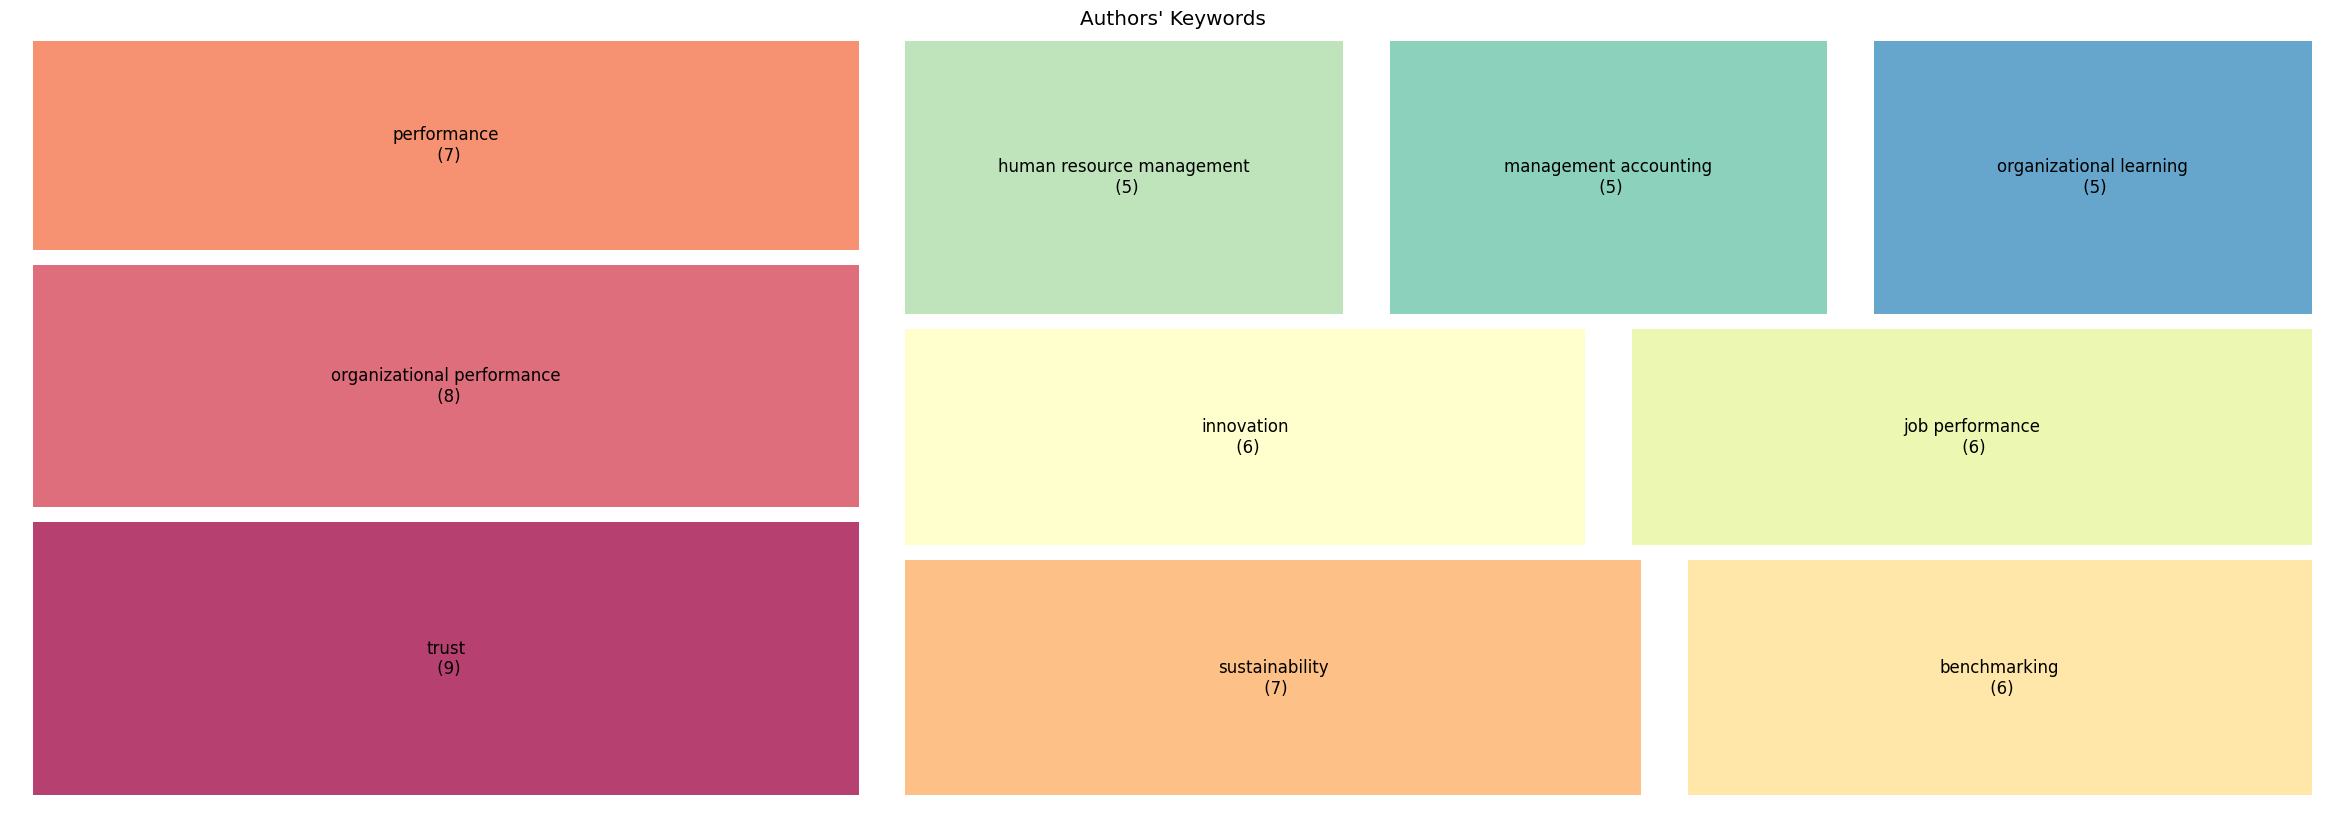

In [15]:
# Tree Map
# Arguments: entry         = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn          = Total number entities
#            txt_font_size = Font size of the text inside the bins;
bibfile.tree_map(entry = 'kwa', topn = 10, size_x = 30, size_y = 10, txt_font_size = 12)

In [16]:
# Network - Citation Analisys Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have been cited at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            local_nodes = True or False (True -> Only the blue will be displayed, False -> Red and Blue nodes will be displayed)
bibfile.network_adj_dir(view = 'notebook', min_count = 0, node_labels = True, local_nodes = False)

# Note; in the export there is no detailed information about the citations

In [17]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = [])

In [18]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 3, node_labels = True, label_type = 'name', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

In [19]:
# Network - Similarity Analysis using coupling or cocitation methods. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            sim_type    = 'coup', 'cocit' ('coup' -> Coupling Method, 'cocit' -> Cocitation Method)
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            cut_coup    = Cutoff value for Coupling Method. Only meaninfull if sim_type = 'coup';
#            cut_cocit   = Cutoff value for Cocitation Method. Only meaninfull if sim_type = 'cocit'
bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = -1, node_labels = True, cut_coup = 0.3, cut_cocit = 5)

In [20]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])